In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# cd workspace/theislab/mubind/notebooks/dinucleotide

In [5]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [6]:
import itertools

def _mismatch(word, letters, num_mismatches):
    for locs in itertools.combinations(range(len(word)), num_mismatches):
        this_word = [[char] for char in word]
        for loc in locs:
            orig_char = word[loc]
            this_word[loc] = [l for l in letters if l != orig_char]
        for poss in itertools.product(*this_word):
            yield "".join(poss)



In [7]:
# motif = "ATT"
# x2, y2 = mb.datasets.simulate_xy(motif, n_trials=2100, seqlen=len(motif) + 1, max_mismatches=min(len(motif), 2), counts_size=1)
# x2, y2
# df = pd.DataFrame(data=y2)
# df.columns = [1]
# df.index = x2
# df[0] = 0
# df = df[[0, 1]]

In [8]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)
# data = df.head(1000)
# data = df.copy()
data = df.sample(1000, random_state=50)
# data = df.copy()
data.index = data['seq']

# remove as many nucleotides as posisble (faster training/convergence)
data.index = data.index.astype(str).str[45:]


# data.index = data.index.astype(str).str[-15:]
del data['seq']

In [9]:
data.shape

(1000, 2)

In [10]:
data = data.sample(data.shape[0], random_state=100)

In [11]:
# # define batches
# batch = np.random.randint(2, size=data.shape[0])

In [12]:
# # data[batch == 0] = data[batch == 0] + 20
# # data[batch == 1] = data[batch == 1] + 10
# data['batch'] = batch
#
# data = data[data['batch'] == 1]

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1


In [14]:
# TODO: skipped for now
n_rounds = data.shape[1]

print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, labels=[0, 1])
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=512,
                         shuffle=False)



loading object (# entries) 1000


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np

In [17]:
%load_ext line_profiler


In [18]:
# %lprun -f mb.tl.train_network mb.tl.train_network(model, train, device, next_optimiser, criterion, num_epochs=20, early_stopping=100, log_each=2, dirichlet_regularization=0, exp_max=40, verbose=0)

In [19]:
# %lprun -f mb.tl.train_iterative mb.tl.train_iterative(train, device, w=18, show_logo=False, opt_kernel_shift=0, opt_kernel_length=0, dirichlet_regularization=dirichlet_regularization, lr=[0.01, 0.01], weight_decay=[0.01, 0.001], ignore_kernel=ignore_kernel, num_epochs=2, early_stopping=100, use_dinuc=False, n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None)

In [20]:
y_pred = torch.tensor(data.copy().to_numpy() - 100)
y_true = torch.tensor(data.copy().to_numpy() - 100)
torch.mean(y_pred - y_true * torch.log(y_pred))
torch.log(y_pred)
criterion = mb.tl.PoissonLoss()
criterion(y_pred, y_true)

tensor(nan)



##NEW JOB
ignore kernel 1
next w 15 <class 'int'>
# rounds {2}
# batches 1
# kernels 2
# initial w 15
# enr_series True

Kernel to optimize 0

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel mono at 0 to 1
setting grad status of kernel dinuc at 0 to 0
setting grad status of kernel mono at 1 to 0
setting grad status of kernel dinuc at 1 to 0


before kernel optimization.


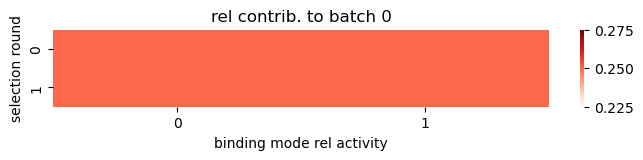


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


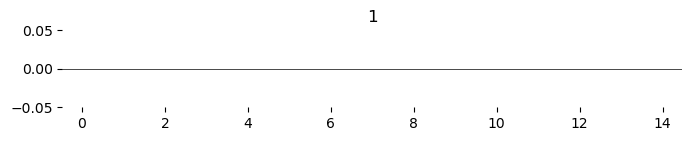

60


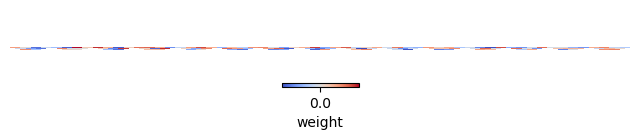

kernels mask [0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 10
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch: 16, Loss: 0.8459 , best epoch: 5 secs per epoch: 0.173 s
early stop!
total time: 2.5923192501068115s 16
secs per epoch: 0.173 s

##After kernel opt / before shift optim.


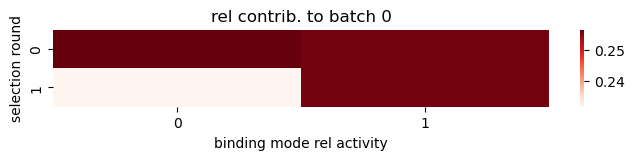


#activities
[[[1.0029106 0.9044106]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1005, -0.1005]], device='cuda:0', requires_grad=True)


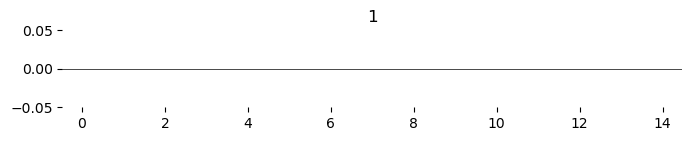

60


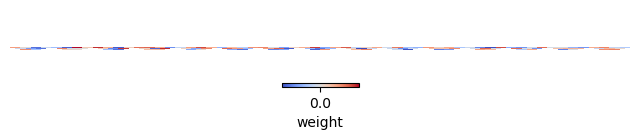

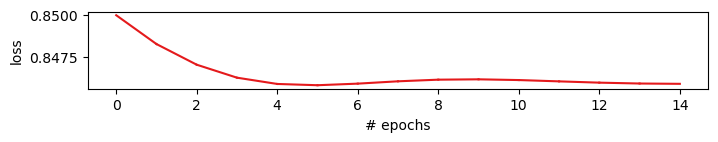

after shift optimz model


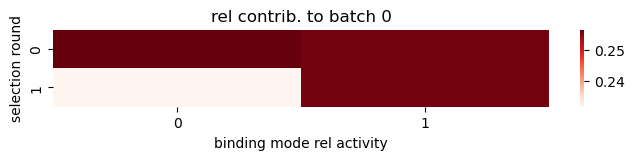


#activities
[[[1.0029106 0.9044106]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1005, -0.1005]], device='cuda:0', requires_grad=True)


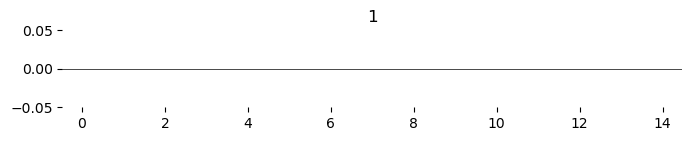

60


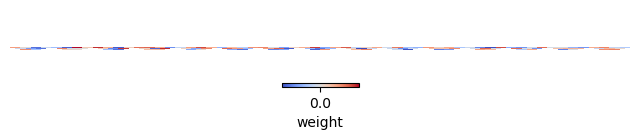

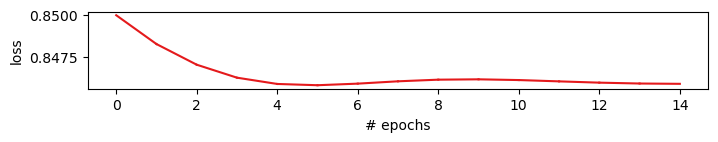


optimizing feature type dinuc
setting grad status of kernel mono at 0 to 0
setting grad status of kernel dinuc at 0 to 1
setting grad status of kernel mono at 1 to 0
setting grad status of kernel dinuc at 1 to 0


before kernel optimization.


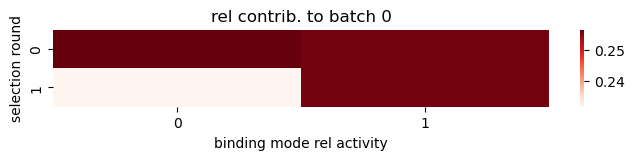


#activities
[[[1.0029106 0.9044106]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1005, -0.1005]], device='cuda:0', requires_grad=True)


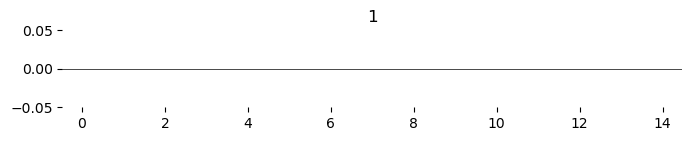

60


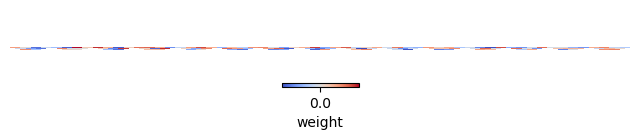

kernels mask [0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 10
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch: 17, Loss: 0.8459 , best epoch: 6 secs per epoch: 0.044 s
early stop!
total time: 0.7002954483032227s 17
secs per epoch: 0.044 s

##After kernel opt / before shift optim.


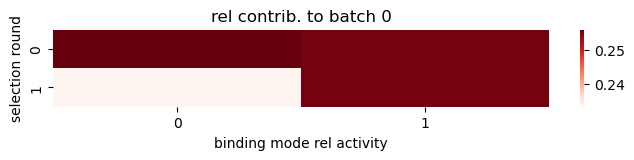


#activities
[[[1.0025598  0.91289824]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0911, -0.0911]], device='cuda:0', requires_grad=True)


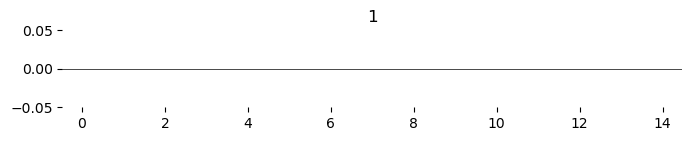

60


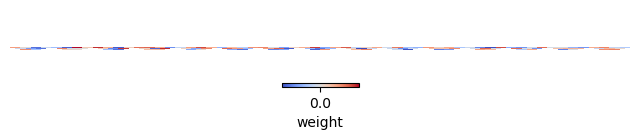

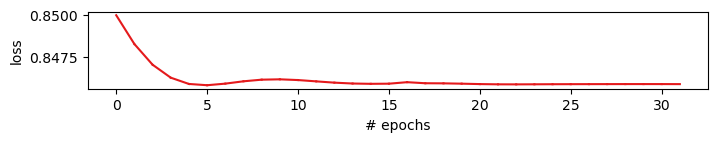

after shift optimz model


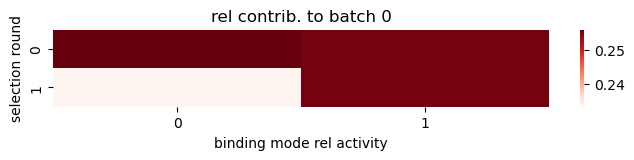


#activities
[[[1.0025598  0.91289824]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0911, -0.0911]], device='cuda:0', requires_grad=True)


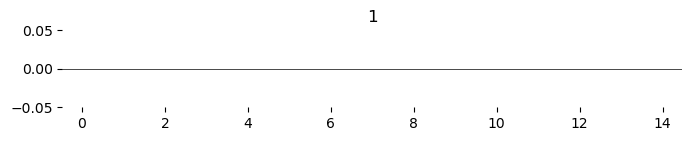

60


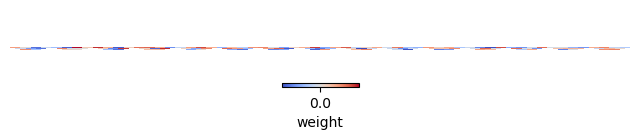

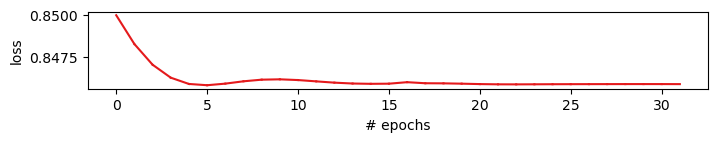



Kernel to optimize 1

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel mono at 0 to 0
setting grad status of kernel dinuc at 0 to 0
setting grad status of kernel mono at 1 to 1
setting grad status of kernel dinuc at 1 to 0


before kernel optimization.


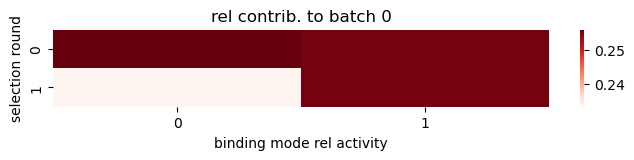


#activities
[[[1.0025598  0.91289824]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0911, -0.0911]], device='cuda:0', requires_grad=True)


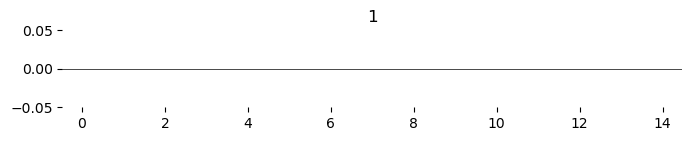

60


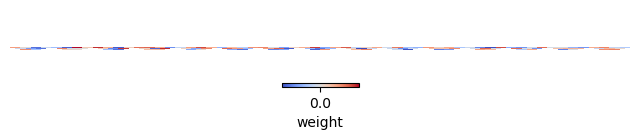

kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.850206 , best epoch: 16 secs per epoch: 0.049 s
Epoch: 51, Loss: 0.845642 , best epoch: 49 secs per epoch: 0.039 s
Epoch: 76, Loss: 0.845342 , best epoch: 74 secs per epoch: 0.038 s
Epoch: 101, Loss: 0.845035 , best epoch: 99 secs per epoch: 0.036 s
Epoch: 126, Loss: 0.844702 , best epoch: 124 secs per epoch: 0.034 s
Epoch: 151, Loss: 0.844366 , best epoch: 149 secs per epoch: 0.034 s
Epoch: 176, Loss: 0.844054 , best epoch: 174 secs per epoch: 0.034 s
total time: 6.743738651275635s 200
secs per epoch: 0.034 s

##After kernel opt / before shift optim.


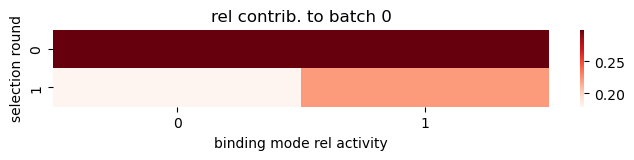


#activities
[[[0.9999995  0.5977064 ]
  [0.99999696 0.7390049 ]]]

#log_etas
Parameter containing:
tensor([[ 0.4231, -0.4231]], device='cuda:0', requires_grad=True)


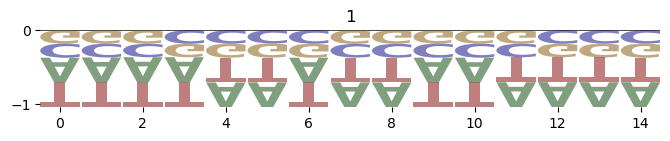

60


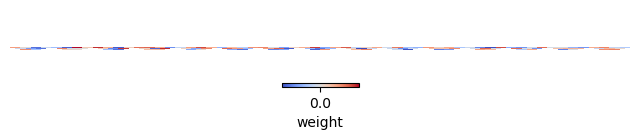

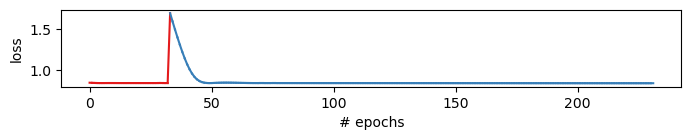


FILTER SHIFT OPTIMIZATION (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.843045 , best epoch: 24 secs per epoch: 0.047 s
Epoch: 51, Loss: 0.842736 , best epoch: 49 secs per epoch: 0.046 s
Epoch: 76, Loss: 0.841559 , best epoch: 74 secs per epoch: 0.041 s
Epoch: 101, Loss: 0.838345 , best epoch: 99 secs per epoch: 0.038 s
Epoch: 126, Loss: 0.834683 , best epoch: 124 secs per epoch: 0.037 s
Epoch: 151, Loss: 0.832547 , best epoch: 149 secs per epoch: 0.036 s
Epoch: 176, Loss: 0.830839 , best epoch: 174 secs per epoch: 0.036 s
total time: 7.155289888381958s 200
secs per epoch: 0.036 s
after opt.

#activities
[[[0.9999995  0.53269154]
  [1.0000033  0.5583598 ]]]

#log_etas
Parameter containing:
tensor([[ 0.8795, -0.8795]], device='cuda:0', requires_grad=True)


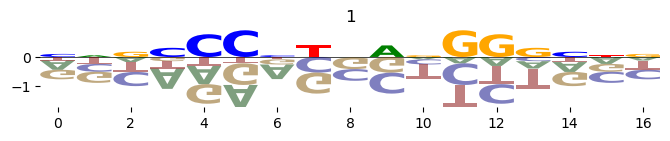

60


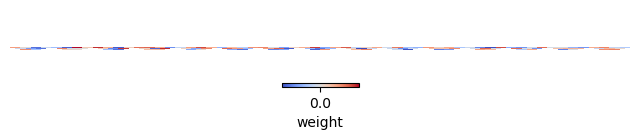

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.843032 , best epoch: 24 secs per epoch: 0.036 s
Epoch: 51, Loss: 0.842723 , best epoch: 49 secs per epoch: 0.036 s
Epoch: 76, Loss: 0.841462 , best epoch: 74 secs per epoch: 0.037 s
Epoch: 101, Loss: 0.837980 , best epoch: 99 secs per epoch: 0.036 s
Epoch: 126, Loss: 0.832711 , best epoch: 124 secs per epoch: 0.036 s
Epoch: 151, Loss: 0.823743 , best epoch: 149 secs per epoch: 0.036 s
Epoch: 176, Loss: 0.817872 , best epoch: 174 secs per epoch: 0.036 s
total time: 7.252015829086304s 200
secs per epoch: 0.036 s
after opt.

#activities
[[[1.0000005  0.44495073]
  [1.0000017  0.54432756]]]

#log_etas
Parameter containing:
tensor([[ 0.9645, -0.9645]], device='cuda:0', requires_grad=True)


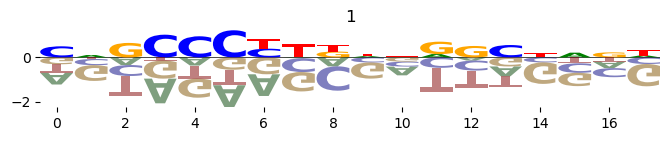

60


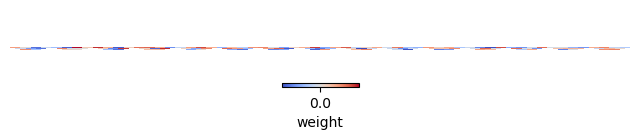

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.843032 , best epoch: 24 secs per epoch: 0.040 s
Epoch: 51, Loss: 0.842723 , best epoch: 49 secs per epoch: 0.036 s
Epoch: 76, Loss: 0.841462 , best epoch: 74 secs per epoch: 0.037 s
Epoch: 101, Loss: 0.837980 , best epoch: 99 secs per epoch: 0.039 s
Epoch: 126, Loss: 0.832711 , best epoch: 124 secs per epoch: 0.038 s
Epoch: 151, Loss: 0.823744 , best epoch: 149 secs per epoch: 0.038 s
Epoch: 176, Loss: 0.817872 , best epoch: 174 secs per epoch: 0.037 s
total time: 7.339761018753052s 200
secs per epoch: 0.037 s
after opt.

#activities
[[[0.99999946 0.44495094]
  [0.999997   0.54432756]]]

#log_etas
Parameter containing:
tensor([[ 0.9645, -0.9645]], device='cuda:0', requires_grad=True)


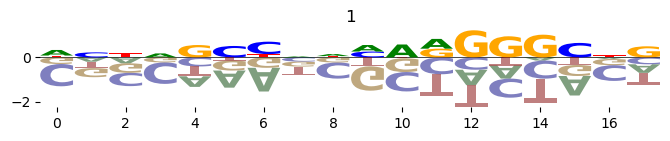

60


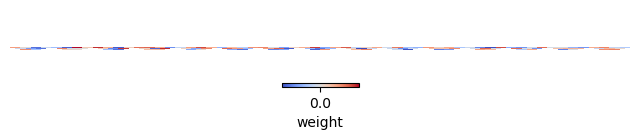

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.842986 , best epoch: 24 secs per epoch: 0.038 s
Epoch: 51, Loss: 0.842617 , best epoch: 49 secs per epoch: 0.039 s
Epoch: 76, Loss: 0.841207 , best epoch: 74 secs per epoch: 0.037 s
Epoch: 101, Loss: 0.837017 , best epoch: 99 secs per epoch: 0.039 s
Epoch: 126, Loss: 0.830823 , best epoch: 124 secs per epoch: 0.041 s
Epoch: 151, Loss: 0.828375 , best epoch: 149 secs per epoch: 0.041 s
Epoch: 176, Loss: 0.827917 , best epoch: 174 secs per epoch: 0.040 s
total time: 7.98647403717041s 200
secs per epoch: 0.040 s
after opt.

#activities
[[[1.0000004 0.5143306]
  [1.000003  0.5788268]]]

#log_etas
Parameter containing:
tensor([[ 0.8704, -0.8704]], device='cuda:0', requires_grad=True)


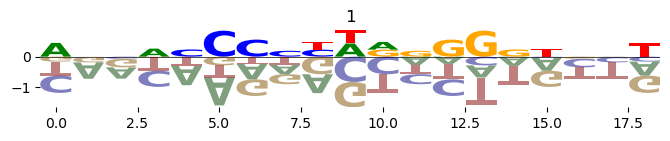

60


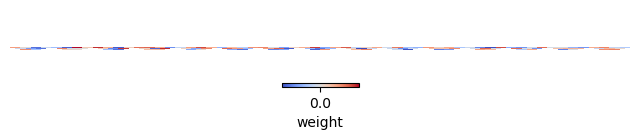

sorted
   expand.left  expand.right  shift      loss
0            1             2      0  0.814858
1            2             1      0  0.814858
2            2             2      0  0.827787
3            1             1      0  0.829675
4            0             0      0  0.843799
action: (1, 2, 0)


FILTER SHIFT OPTIMIZATION (again)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.813208 , best epoch: 24 secs per epoch: 0.032 s
Epoch: 51, Loss: 0.812245 , best epoch: 49 secs per epoch: 0.033 s
Epoch: 76, Loss: 0.811702 , best epoch: 74 secs per epoch: 0.031 s
Epoch: 101, Loss: 0.811236 , best epoch: 99 secs per epoch: 0.032 s
Epoch: 126, Loss: 0.810786 , best epoch: 124 secs per epoch: 0.037 s
Epoch: 151, Loss: 0.810470 , best epoch: 149 secs per epoch: 0.037 s
Epoch: 176, Loss: 0.810293 , best 

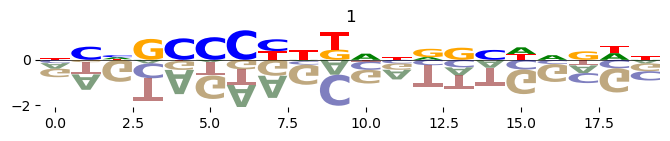

60


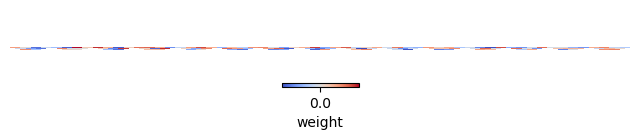

sorted
   expand.left  expand.right  shift      loss
0            1             1      0  0.810199
1            0             0      0  0.814858
action: (1, 1, 0)

stop. Reached maximum w...
stop. Reached maximum w...
after shift optimz model


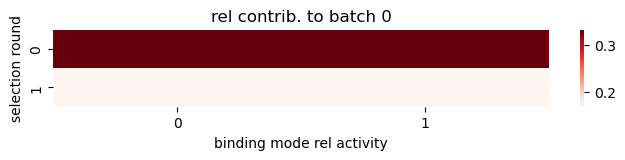


#activities
[[[0.9999996  0.5092127 ]
  [0.9999939  0.50899684]]]

#log_etas
Parameter containing:
tensor([[ 1.1860, -1.1860]], device='cuda:0', requires_grad=True)


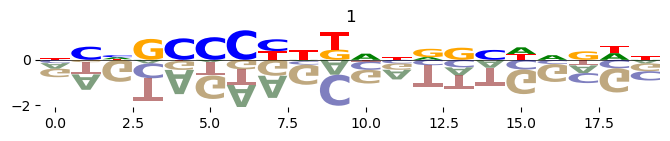

60


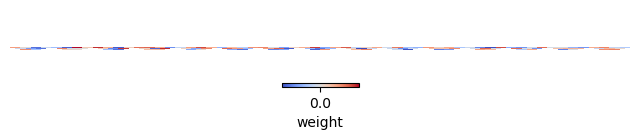

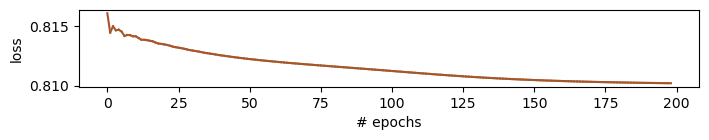




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 

kernels mask [0 0]
kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.810147 , best epoch: 1 secs per epoch: 0.048 s
Epoch: 51, Loss: 0.810112 , best epoch: 1 secs per epoch: 0.042 s
Epoch: 76, Loss: 0.810092 , best epoch: 1 secs per epoch: 0.041 s
Epoch: 101, Loss: 0.810077 , best epoch: 1 secs per epoch: 0.040 s
Epoch: 126, Loss: 0.810066 , best epoch: 1 secs per epoch: 0.039 s
Epoch: 151, Loss: 0.810058 , best epoch: 1 secs per epoch: 0.038 s
Epoch: 176, Loss: 0.810052 , best epoch: 1 secs per epoch: 0.037 s
total time: 7.309037446975708s 200
secs per epoch: 0.037 s

##final motif signal (after final refinement)


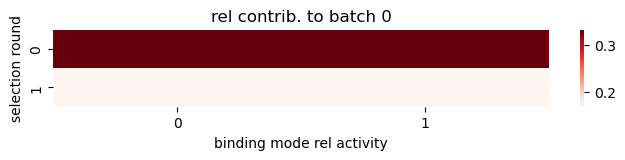


#activities
[[[0.9999996  0.5092127 ]
  [1.0012681  0.50784266]]]

#log_etas
Parameter containing:
tensor([[ 1.1884, -1.1884]], device='cuda:0', requires_grad=True)


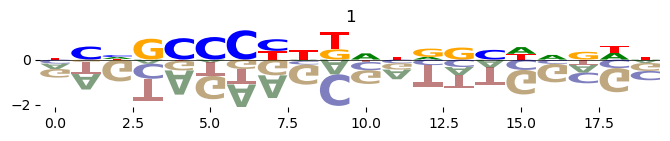

60


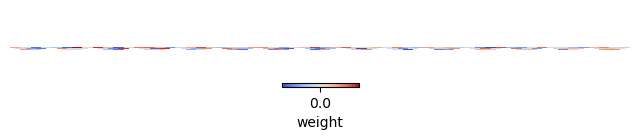

best loss 0.8100435733795166
grad
tensor([[[[ 4.1734e-03,  1.4238e-03,  8.3499e-04, -9.4634e-05,  1.6287e-03,
           -2.3962e-04,  8.4968e-04,  6.6355e-04,  1.0870e-03,  2.5209e-03,
            4.5488e-03,  1.9698e-03,  3.0384e-03,  1.9570e-03,  3.2611e-03,
            4.5569e-03,  3.6408e-03,  5.2142e-03,  2.4322e-03,  5.3267e-03],
          [-1.7285e-03,  1.2658e-03,  7.7583e-04,  9.4665e-04,  5.4632e-03,
            3.7434e-03,  2.6368e-04,  1.3057e-03,  1.5324e-03,  1.4199e-03,
            1.9975e-03,  1.3857e-03,  2.9130e-04,  2.5598e-03, -1.4091e-04,
           -5.6154e-04,  1.7268e-03, -4.7539e-04,  1.6614e-03,  2.1092e-03],
          [ 2.1291e-03,  2.4456e-03,  2.4518e-03,  4.2489e-03, -4.7315e-05,
            3.1245e-03,  2.7828e-03,  3.5251e-03,  1.9341e-03,  3.0882e-03,
            1.3755e-03,  2.0566e-03,  2.0412e-03,  1.3486e-03,  1.4676e-03,
            1.7896e-03,  6.4597e-04, -9.9092e-04,  1.6596e-03,  8.4787e-04],
          [ 3.3210e-03,  2.7597e-03,  3.8322e-03,  

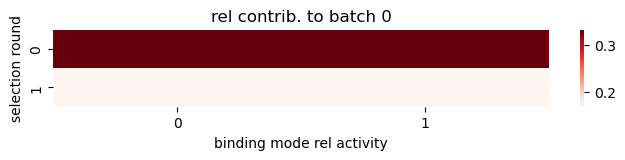


#activities
[[[0.9999996  0.5092127 ]
  [1.0012681  0.50784266]]]

#log_etas
Parameter containing:
tensor([[ 1.1884, -1.1884]], device='cuda:0', requires_grad=True)


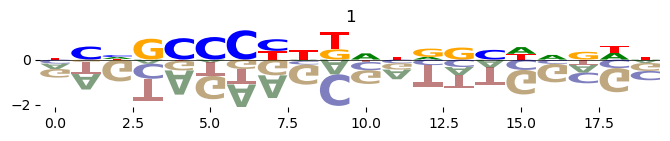

60


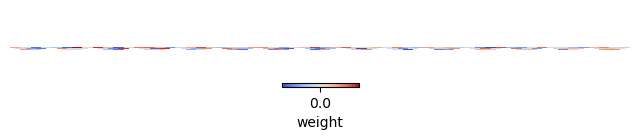

kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.810138 , best epoch: 10 secs per epoch: 0.039 s
Epoch: 51, Loss: 0.810138 , best epoch: 10 secs per epoch: 0.035 s
Epoch: 76, Loss: 0.810134 , best epoch: 10 secs per epoch: 0.034 s
Epoch: 101, Loss: 0.810130 , best epoch: 10 secs per epoch: 0.033 s
Epoch: 126, Loss: 0.810127 , best epoch: 10 secs per epoch: 0.033 s
Epoch: 151, Loss: 0.810124 , best epoch: 149 secs per epoch: 0.034 s
Epoch: 176, Loss: 0.810121 , best epoch: 174 secs per epoch: 0.033 s
total time: 6.422411203384399s 200
secs per epoch: 0.032 s

##After kernel opt / before shift optim.


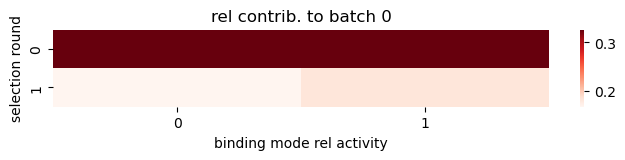


#activities
[[[0.9999996  0.5092127 ]
  [1.000005   0.55358446]]]

#log_etas
Parameter containing:
tensor([[ 1.1726, -1.1726]], device='cuda:0', requires_grad=True)


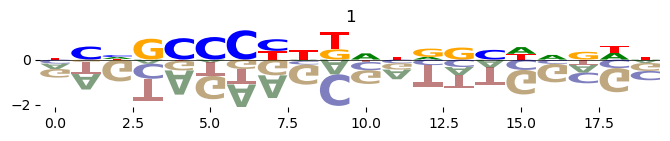

60


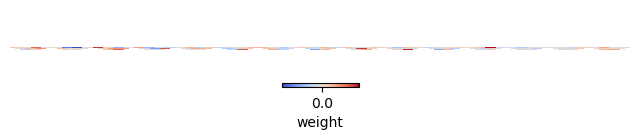

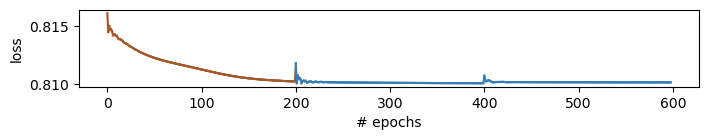

stop. Reached maximum w...
stop. Reached maximum w...
after shift optimz model


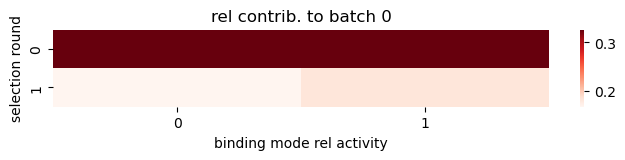


#activities
[[[0.9999996  0.5092127 ]
  [1.000005   0.55358446]]]

#log_etas
Parameter containing:
tensor([[ 1.1726, -1.1726]], device='cuda:0', requires_grad=True)


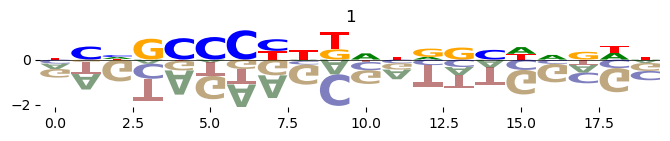

60


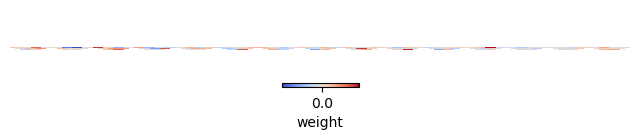

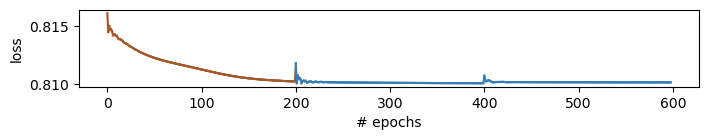




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 

kernels mask [0 0]
kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 200 early_stopping 200
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.810170 , best epoch: 1 secs per epoch: 0.039 s
Epoch: 51, Loss: 0.810128 , best epoch: 1 secs per epoch: 0.035 s
Epoch: 76, Loss: 0.810107 , best epoch: 1 secs per epoch: 0.034 s
Epoch: 101, Loss: 0.810090 , best epoch: 1 secs per epoch: 0.034 s
Epoch: 126, Loss: 0.810078 , best epoch: 1 secs per epoch: 0.035 s
Epoch: 151, Loss: 0.810069 , best epoch: 1 secs per epoch: 0.035 s
Epoch: 176, Loss: 0.810062 , best epoch: 1 secs per epoch: 0.034 s
total time: 6.829114198684692s 200
secs per epoch: 0.034 s

##final motif signal (after final refinement)


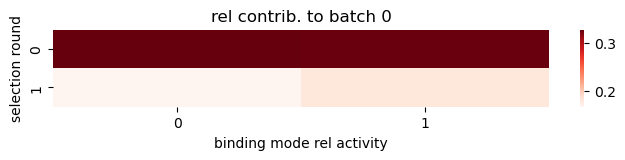


#activities
[[[0.9999996  0.5092127 ]
  [0.99768525 0.55210173]]]

#log_etas
Parameter containing:
tensor([[ 1.1753, -1.1753]], device='cuda:0', requires_grad=True)


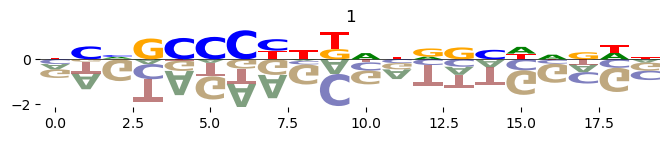

60


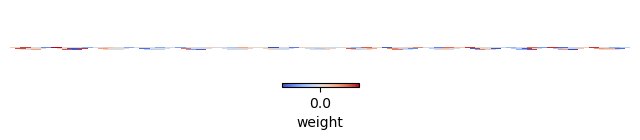

best loss 0.8100393712520599
grad
tensor([[[[ 4.1726e-03,  1.4265e-03,  8.3508e-04, -9.1498e-05,  1.6308e-03,
           -2.3649e-04,  8.5201e-04,  6.6408e-04,  1.0893e-03,  2.5232e-03,
            4.5470e-03,  1.9711e-03,  3.0382e-03,  1.9590e-03,  3.2605e-03,
            4.5537e-03,  3.6399e-03,  5.2127e-03,  2.4326e-03,  5.3231e-03],
          [-1.7246e-03,  1.2674e-03,  7.7951e-04,  9.4878e-04,  5.4605e-03,
            3.7416e-03,  2.6615e-04,  1.3086e-03,  1.5338e-03,  1.4221e-03,
            1.9977e-03,  1.3868e-03,  2.9350e-04,  2.5610e-03, -1.3773e-04,
           -5.5767e-04,  1.7279e-03, -4.7399e-04,  1.6624e-03,  2.1109e-03],
          [ 2.1299e-03,  2.4453e-03,  2.4528e-03,  4.2466e-03, -4.4075e-05,
            3.1260e-03,  2.7824e-03,  3.5250e-03,  1.9371e-03,  3.0872e-03,
            1.3788e-03,  2.0584e-03,  2.0426e-03,  1.3487e-03,  1.4688e-03,
            1.7921e-03,  6.4943e-04, -9.8719e-04,  1.6623e-03,  8.5060e-04],
          [ 3.3218e-03,  2.7606e-03,  3.8324e-03,  

In [21]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 200
log_each = 25
n_kernels = 2
w = 15 # min(len(motif), 6)
opt_kernel_shift = 1
opt_kernel_length = 1

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

criterion = mb.tl.PoissonLoss()

for ignore_kernel in [1]: # [0, 1]:
    print('\n\n##NEW JOB')
    print('ignore kernel', ignore_kernel)
    model_by_k, res_next = mb.tl.optimize_iterative(train, device,
                                                    w=w,
                                                    show_logo=1,
                                                    criterion=criterion,
                                                    use_mono=True,
                                                    use_dinuc=True,
                                                    opt_kernel_shift=opt_kernel_shift,
                                                    opt_kernel_length=opt_kernel_length,
                                                    dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                    lr=[0.01, 0.01],
                                                    weight_decay=[0.01, 0.001],
                                                    ignore_kernel=ignore_kernel,
                                                    num_epochs=n_epochs,
                                                    early_stopping=[10, 200], # optimiser=torch.optim.LBFGS,
                                                    n_kernels=n_kernels,
                                                    log_each=log_each,
                                                    stop_at_kernel=None) #  seed=seed) # seeds.index[0]) #
    print('##DONE....\n\n')


print('total time: %.3f s' % ((time.time() - t0)))
# res = []
# model_by_k = {}

model = model_by_k



### We can visualize the overall results obtained by the network, once the training is finished

In [22]:
model.binding_modes.conv_di[1].weight.max()

tensor(0.0051, device='cuda:0', grad_fn=<MaxBackward1>)

In [23]:
import mubind as mb

In [24]:
model = model_by_k
mb.tl.scores(model, train)


{'r2_counts': 0.16022615067994894,
 'r2_foldchange': 0.12611112042607875,
 'r2_enr': 0.023667100762604476,
 'r2_fc': 0.13321273325533184,
 'pearson_foldchange': 0.3649831958533596}

In [25]:
counts = mb.tl.predict(model, train)
counts

,t0,t1,p0,p1,batch,n_rounds,enr_pred,enr_obs,f_pred,f_obs
AGTATAGTCGTCCTTACCTTCTGCG,1.0,0.0,0.667580,0.332420,0,2,0.799014,0.5,-0.097445,-0.30103
GGCGGGGGCGAGTAACTGCCTAGTG,1.0,0.0,0.511490,0.488510,0,2,0.984797,0.5,-0.006653,-0.30103
GGCGCCCGAGCAGTAATTACTATTT,0.0,1.0,0.515174,0.484826,0,2,0.979970,2.0,-0.008787,0.30103
GTAGCTTGAGAAACGTCGAAAGTCA,1.0,0.0,0.753386,0.246614,0,2,0.710975,0.5,-0.148145,-0.30103
ACAACGATCACCGGTCATAAGCGTG,1.0,0.0,0.779493,0.220507,0,2,0.685874,0.5,-0.163756,-0.30103
...,...,...,...,...,...,...,...,...,...,...
GCGCATGTTAGTGTCGCAACAGGGC,0.0,1.0,0.406017,0.593983,0,2,1.133687,2.0,0.054493,0.30103
GCGGAATAGGTGGGGTACTACAAGC,0.0,1.0,0.645425,0.354575,0,2,0.823237,2.0,-0.084475,0.30103
CGTCCACCGTCTAGGCGCTGCAGGG,1.0,0.0,0.428477,0.571523,0,2,1.100139,0.5,0.041448,-0.30103
GTCGCTGCCTCCTTAGATAGGACTC,1.0,0.0,0.484173,0.515827,0,2,1.021328,0.5,0.009165,-0.30103


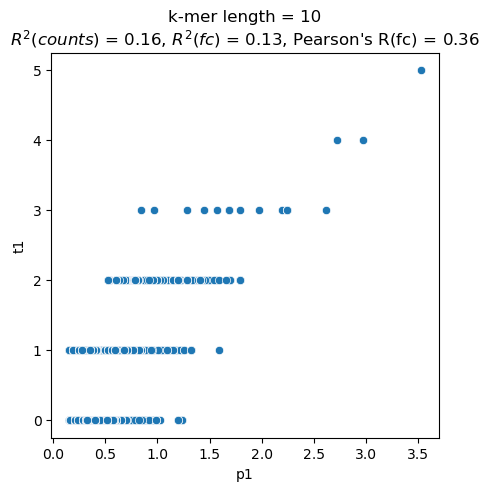

{'r2_counts': 0.16022615067994894,
 'r2_foldchange': 0.12611112042607875,
 'r2_enr': 0.023667100762604476,
 'r2_fc': 0.13321273325533184,
 'pearson_foldchange': 0.3649831958533596}

In [967]:
rcParams['figure.figsize'] = 5, 5
mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', k=10)

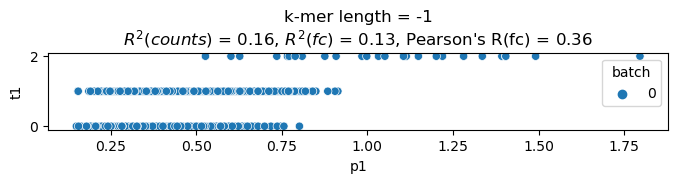

{'r2_counts': 0.16022615067994894,
 'r2_foldchange': 0.12611112042607875,
 'r2_enr': 0.023667100762604476,
 'r2_fc': 0.13321273325533184,
 'pearson_foldchange': 0.3649831958533596}

In [27]:
mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1')

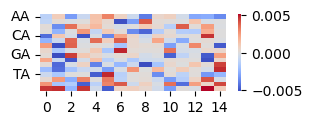

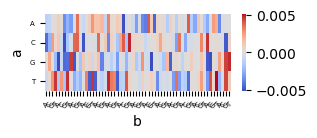

60


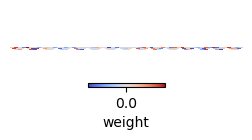

In [28]:
for mode in ['simple', 'complex', 'triangle']:
    mb.pl.conv_di(model, mode=mode, figsize=[3, 1])

In [29]:
model.binding_modes.conv_di[1].weight

Parameter containing:
tensor([[[[-1.1765e-03,  9.5484e-04, -3.1652e-03, -7.4002e-04,  1.3384e-03,
            3.0859e-03,  6.8188e-04, -6.2893e-04, -3.9765e-03,  4.9663e-04,
            7.7652e-04, -4.1656e-04, -2.8008e-03, -2.6621e-03, -3.6475e-03],
          [-1.0446e-03,  2.6301e-04, -1.7752e-04,  7.5535e-05,  1.2969e-03,
            3.6886e-04, -5.0477e-03, -3.0522e-03,  3.9275e-03,  1.9838e-04,
            1.1675e-04, -7.3098e-05,  1.3054e-03, -2.5135e-04, -7.7273e-05],
          [ 1.7695e-04, -3.5672e-03,  3.4954e-03,  8.7646e-04,  1.6708e-03,
            2.2019e-04, -3.3820e-04,  2.9416e-05,  1.0114e-03,  3.4085e-04,
           -1.3190e-03,  3.8943e-03,  1.7729e-04,  2.4819e-03, -1.2280e-04],
          [ 1.1998e-04, -2.4479e-03, -5.9529e-05,  2.6372e-03, -9.0309e-04,
            1.0666e-03,  1.6069e-04, -3.6321e-03, -4.5329e-03, -1.3821e-03,
            2.2725e-04, -1.3969e-03, -1.5075e-03,  2.0303e-03,  5.2552e-06],
          [-4.3596e-03,  1.1851e-03, -3.0678e-04, -4.9695e-03,


#activities
[[[0.9999996  0.5092127 ]
  [0.99768525 0.55210173]]]

#log_etas
Parameter containing:
tensor([[ 1.1753, -1.1753]], device='cuda:0', requires_grad=True)
(4, 20)
<class 'int'>
[0, 5, 10, 15]


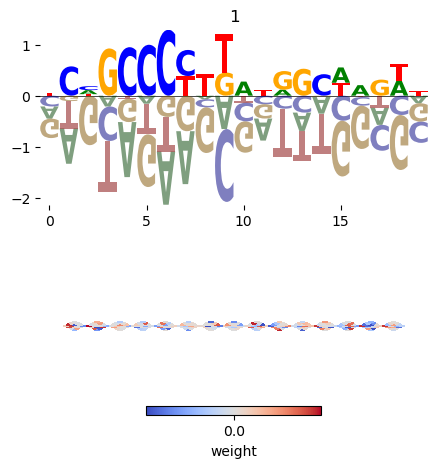

In [1029]:
mb.pl.conv(model)



#activities
[[[0.9999996  0.5092127 ]
  [0.99768525 0.55210173]]]

#log_etas
Parameter containing:
tensor([[ 1.1753, -1.1753]], device='cuda:0', requires_grad=True)
(4, 20)
<class 'int'>
[0, 5, 10, 15]


TypeError: Dimensions of C (60, 68) are incompatible with X (61) and/or Y (61); see help(pcolormesh)

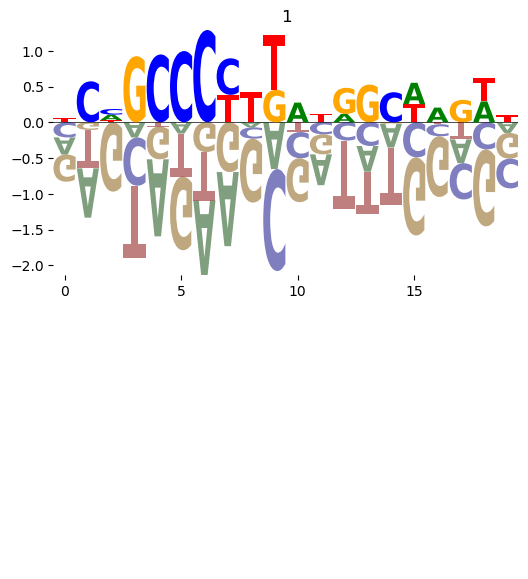

In [1011]:
mb.pl.conv(model, figsize=[6, 7])
